In [11]:
from random import random
import matplotlib.pyplot as plt
# flaot accuracy
ACC = 4
MAX_VAL = 20.0
MIN_VAL = 0

In [76]:
class pos:
    def __init__(self, w, c1, c2, r1=None, r2=None, gbest=None):
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.r1 = r1 if r1 else random()
        self.r2 = r2 if r2 else random()
        self.gbest = gbest
    
    def velocity(self, v_prev: list, lbest: list, gbest: list, pos: list):
        v1, v2 = v_prev
        lb1, lb2 = lbest
        gb1, gb2 = gbest
        x1, x2 = pos
        new_v1 = round(self._vel(v1, lb1, gb1, x1), ACC)
        new_v2 = round(self._vel(v2, lb2, gb2, x2), ACC)
        return [new_v1, new_v2]

    def _vel(self, v_prev: float, lbest: float, gbest: float, x: float):
        # print(f"{self.w} * {v_prev} + {self.c1} * {self.r1} * ({lbest} - {x}) + {self.c2} * {self.r2} * ({gbest} - {x})")
        return (self.w * v_prev) + (self.c1 * self.r1) * (lbest - x) + (self.c2 * self.r2) * (gbest - x)

    def calculate_new_lb_pos(self, prev_lb: list, new_f_vals: list, new_pos: list):
        new_lb_pos = []
        for idx in range(len(prev_lb)):
            prev_w1, prev_w2 = prev_lb[idx]
            if self.f(prev_w1, prev_w2) > new_f_vals[idx]:
                new_lb_pos.append(prev_lb[idx])
            else:
                new_lb_pos.append(new_pos[idx])
        return new_lb_pos

    def global_best(self, f_vals: list, pos: list, prev_gb: float=None):
        if not prev_gb:
            return pos[f_vals.index(max(f_vals))]
        else:
            lbest_idx = f_vals.index(max(f_vals))
            if f_vals[lbest_idx] > self.f(prev_gb[0], prev_gb[1]):
                return pos[lbest_idx]
            else:
                return prev_gb
        
    @staticmethod
    def calculate_new_pos(velocity: list, pos: list):
        new_pos = []
        for ([v1, v2], [x1, x2]) in zip(velocity, pos):
            new_x1 = round(v1 + x1, ACC)
            if new_x1 < MIN_VAL:
                new_x1 = MIN_VAL
            elif new_x1 > MAX_VAL:
                new_x1 = MAX_VAL

            new_x2 = round(v2 + x2, ACC)
            if new_x2 < MIN_VAL:
                new_x2 = MIN_VAL
            elif new_x2 > MAX_VAL:
                new_x2 = MAX_VAL

            new_pos.append([new_x1, new_x2])
        return new_pos

    @staticmethod
    def f(x1: float, x2: float):
        y = 10 - pow((x1 - 5), 2) - pow((x2 - 5), 2)
        return round(y, ACC)

algorithm = pos(0.8, 0.1, 0.1, 0.4, 0.3)


### Start values:

In [77]:
start_pos = [
    [5, 10],
    [3, 15],
    [14, 6],
    ]


start_f_vals = [algorithm.f(x1, x2) for [x1, x2] in start_pos]
start_velocity = [[0, 0] for _ in range(len(start_pos))]
start_local_best = [[0, 0] for _ in range(len(start_pos))]

# Iterations

Iteration num: 0
|         V          |  |         w          |  |   f(w)   |  |          p         |
|   0.0000,   0.0000 |  |   5.0000,  10.0000 |  | -15.0000 |  |   0.0000,   0.0000 |
|   0.0000,   0.0000 |  |   3.0000,  15.0000 |  | -94.0000 |  |   0.0000,   0.0000 |
|   0.0000,   0.0000 |  |  14.0000,   6.0000 |  | -72.0000 |  |   0.0000,   0.0000 |
global [5, 10]
random 0.8973, 0.647

Iteration num: 1
|         V          |  |         w          |  |   f(w)   |  |          p         |
|   0.0000,   0.0000 |  |   5.0000,  10.0000 |  | -15.0000 |  |   5.0000,  10.0000 |
|   0.0790,  -0.9842 |  |   3.0790,  14.0158 |  | -74.9749 |  |   0.0000,   0.0000 |
|  -1.3171,   0.1581 |  |  12.6829,   6.1581 |  | -50.3681 |  |   0.0000,   0.0000 |
global [5, 10]
random 0.3496, 0.9196

Iteration num: 2
|         V          |  |         w          |  |   f(w)   |  |          p         |
|   0.0000,   0.0000 |  |   5.0000,  10.0000 |  | -15.0000 |  |   5.0000,  10.0000 |
|  -0.0585,  -1.7353 |  

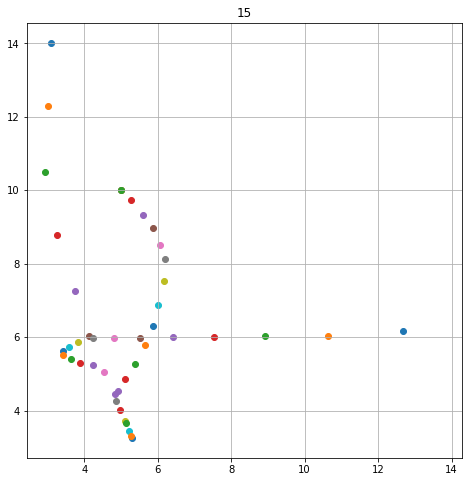

In [83]:
prev_vs = start_velocity
prev_lb = start_local_best
prev_pos = start_pos
prev_gb = algorithm.global_best(start_f_vals, prev_pos)
prev_f_vals = start_f_vals
new_vs = []
print(f"Iteration num: 0")
print("|         V          |  |         w          |  |   f(w)   |  |          p         |")
for idx in range(len(prev_pos)):
    print("| %8.4f, %8.4f |  | %8.4f, %8.4f |  | %8.4f |  | %8.4f, %8.4f |" % (prev_vs[idx][0], prev_vs[idx][1], prev_pos[idx][0],\
            prev_pos[idx][1], prev_f_vals[idx], prev_lb[idx][0], prev_lb[idx][1]))

print(f"global {prev_gb}")
print(f"random {algorithm.r1}, {algorithm.r2}")
print()
prev_lb = algorithm.calculate_new_lb_pos(prev_lb, prev_f_vals, prev_pos)

for i in range(15):
    new_vs = []
    new_pos = []
    new_gb = []
    new_lb = []
    algorithm.r1 = round(random(), ACC)
    algorithm.r2 = round(random(), ACC)

    for idx in range(len(prev_vs)):
        new_v = algorithm.velocity(prev_vs[idx], prev_lb[idx], prev_gb, prev_pos[idx])
        new_vs.append(new_v)
        
    new_pos = algorithm.calculate_new_pos(new_vs, prev_pos)

    new_f_vals = []
    for [x1, x2] in new_pos:
        new_f_vals.append(algorithm.f(x1, x2))

    new_gb = algorithm.global_best(new_f_vals, new_pos, prev_gb)

    new_lb = algorithm.calculate_new_lb_pos(prev_lb, new_f_vals, new_pos)

    prev_vs = new_vs
    prev_lb = new_lb
    prev_pos = new_pos
    prev_gb = new_gb
    prev_f_vals = new_f_vals
    
    print(f"Iteration num: {i + 1}")
    print("|         V          |  |         w          |  |   f(w)   |  |          p         |")
    for idx in range(len(new_pos)):
        print("| %8.4f, %8.4f |  | %8.4f, %8.4f |  | %8.4f |  | %8.4f, %8.4f |" % (new_vs[idx][0], new_vs[idx][1], new_pos[idx][0],\
             new_pos[idx][1], new_f_vals[idx], new_lb[idx][0], new_lb[idx][1]))
    print(f"global {new_gb}")
    print(f"random {algorithm.r1}, {algorithm.r2}")
    print()

    plt.scatter([pos[0] for pos in new_pos], [pos[1] for pos in new_pos])
    plt.title(i+1)
    plt.axis('square')
    plt.grid(1)
    plt.rcParams["figure.figsize"] = [8, 8]
    plt.savefig("./plots/" + str(i+1) + ".png")


In [ ]:
import numpy as np
V = np.random.randn(2, 5)
print(V)